<a href="https://colab.research.google.com/github/Mazzarolo/Fox-Image-Detector/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verificar hardware
!nvidia-smi

Thu Jul 27 23:51:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Variavel para verificar o path
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#Instalar o yolo
!pip install ultralytics

from IPython import display
display.clear_output()

!yolo checks

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
#instalar o roboflow e conectar com o dataset
!pip install roboflow

YOUR_PRIVATE_API_KEY = ""

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_PRIVATE_API_KEY")
project = rf.workspace("testing-uutoy").project("fox-detector-dataset")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.143, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Fox-Detector-DataSet-2 in yolov8:: 100%|██████████| 1180/1180 [00:00<00:00, 1693.55it/s]


In [ ]:
# Treinar o dataset
%cd {HOME}

print(dataset.location)

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
/content/Fox-Detector-DataSet-2
Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Fox-Detector-DataSet-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

/content


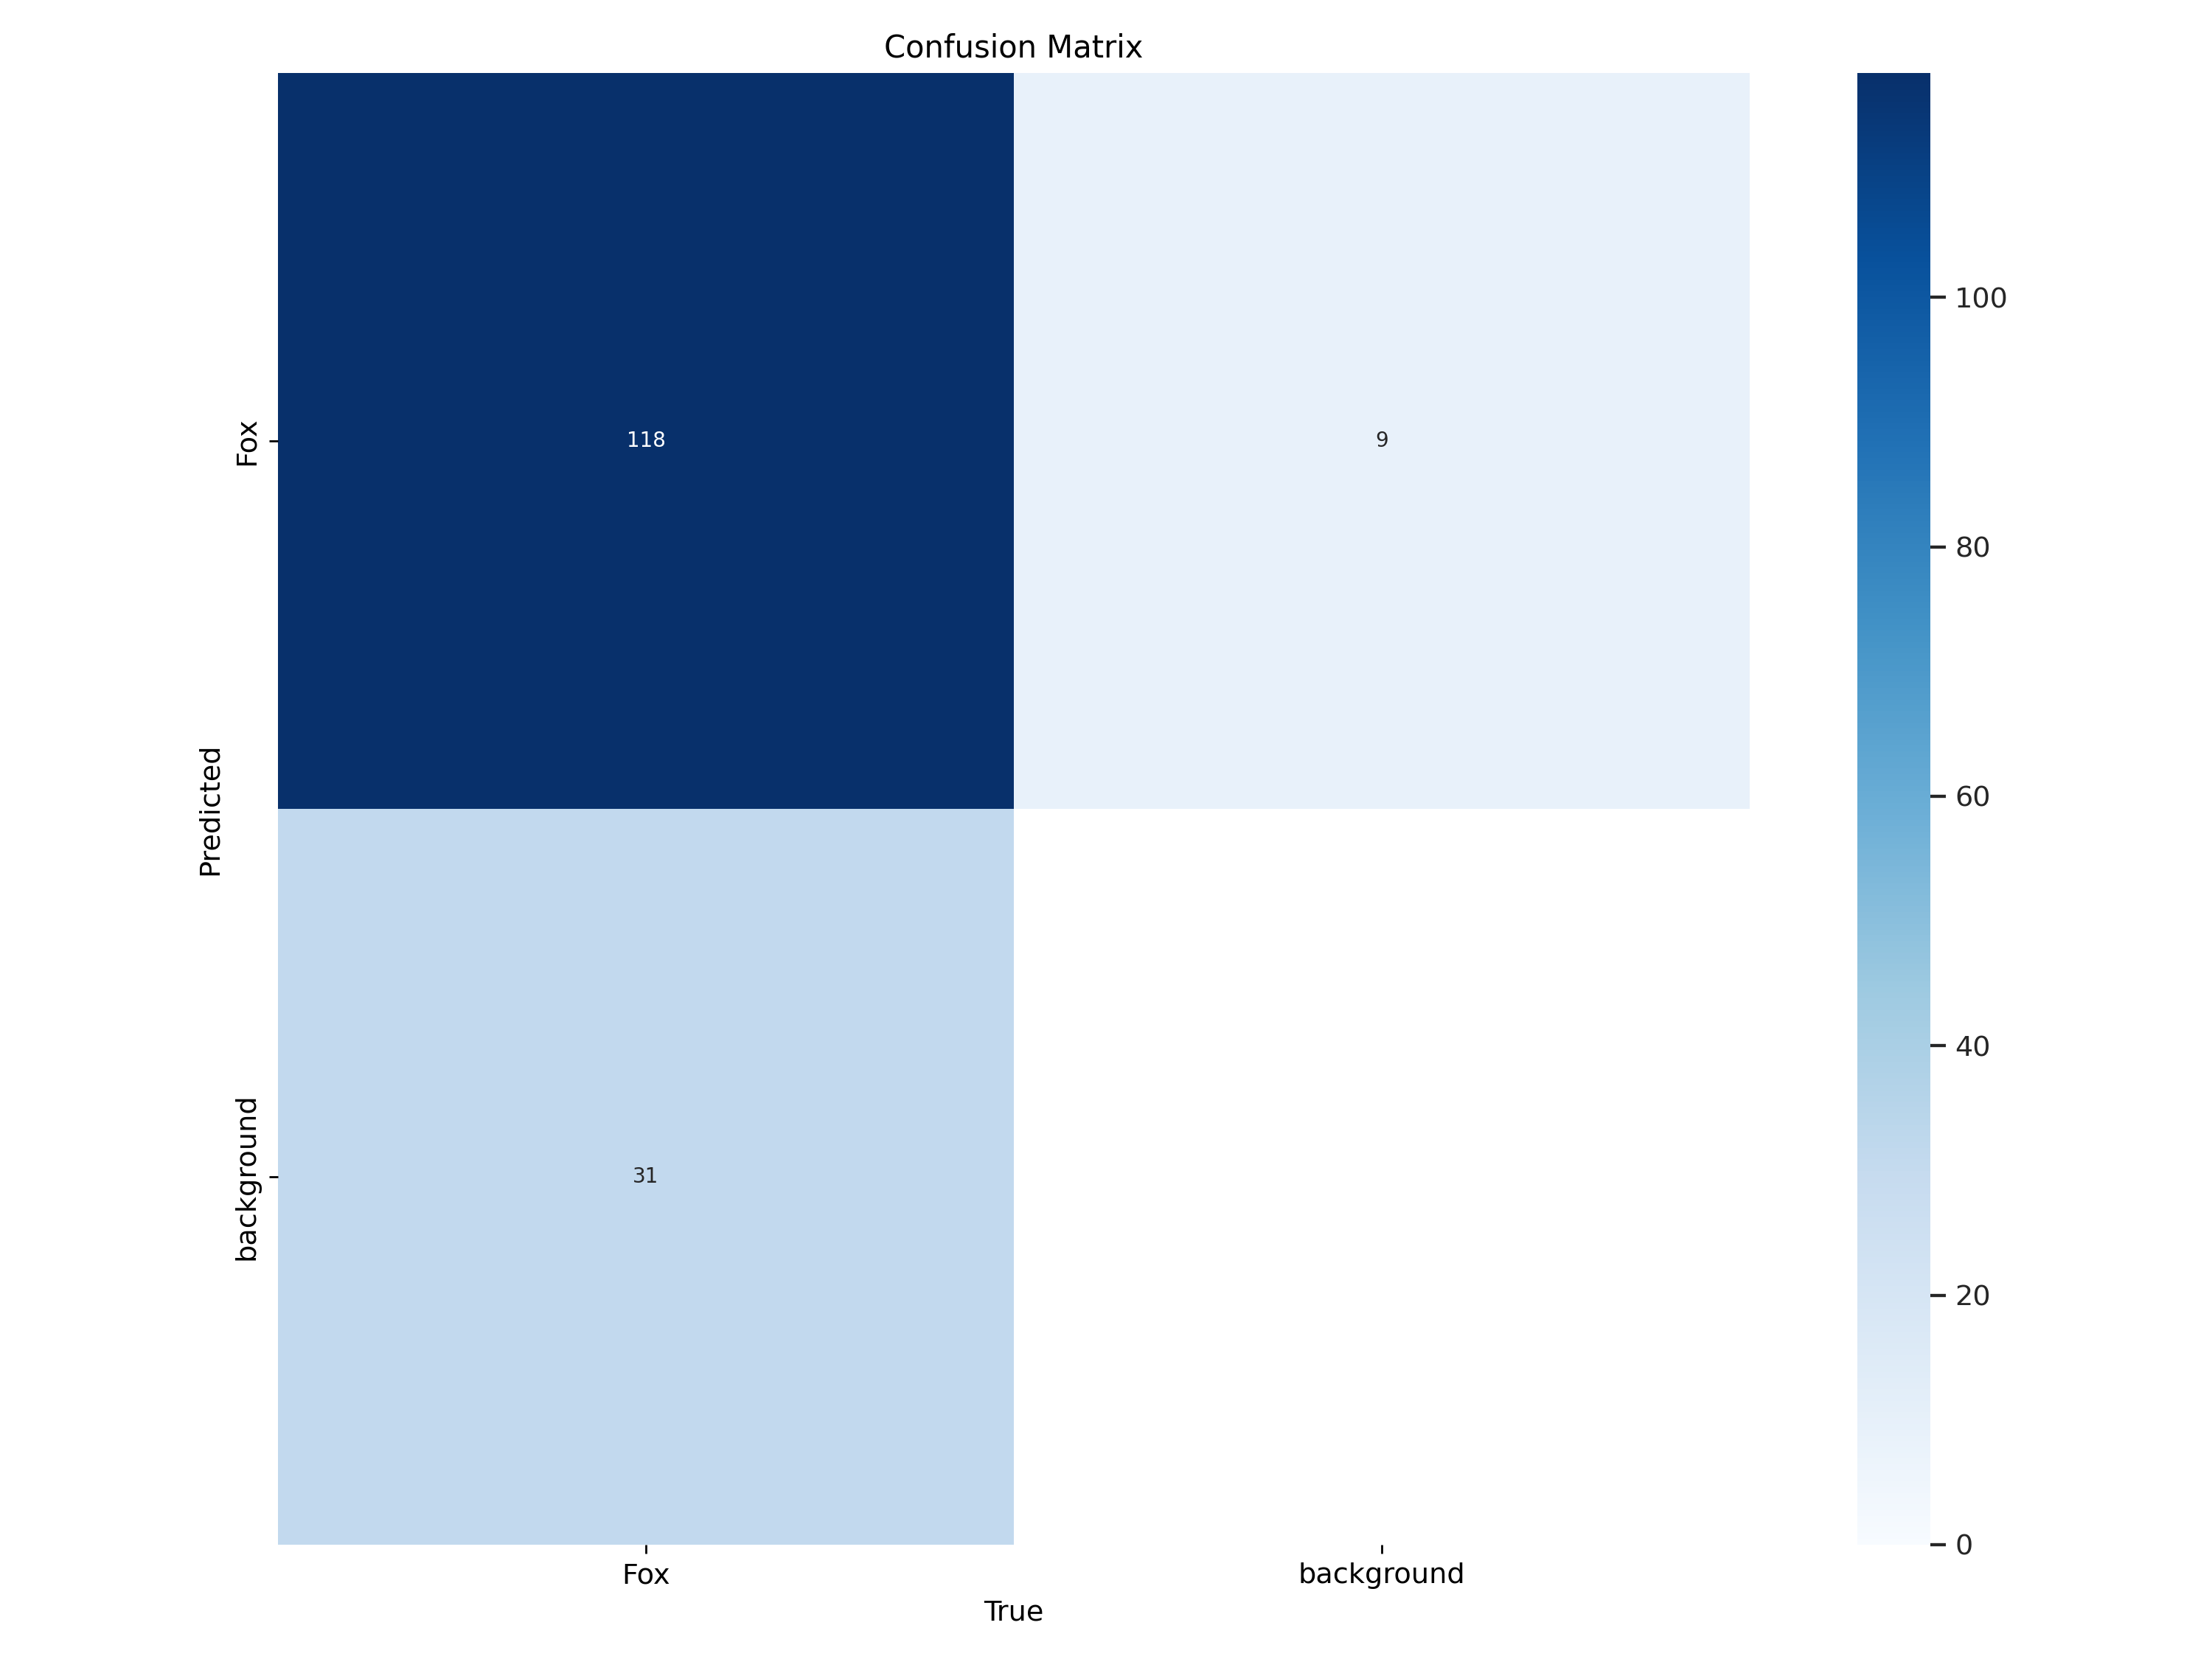

In [ ]:
from PIL import Image

%cd {HOME}

img = Image.open(f'{HOME}/runs/detect/train7/confusion_matrix.png')
img.show()

/content


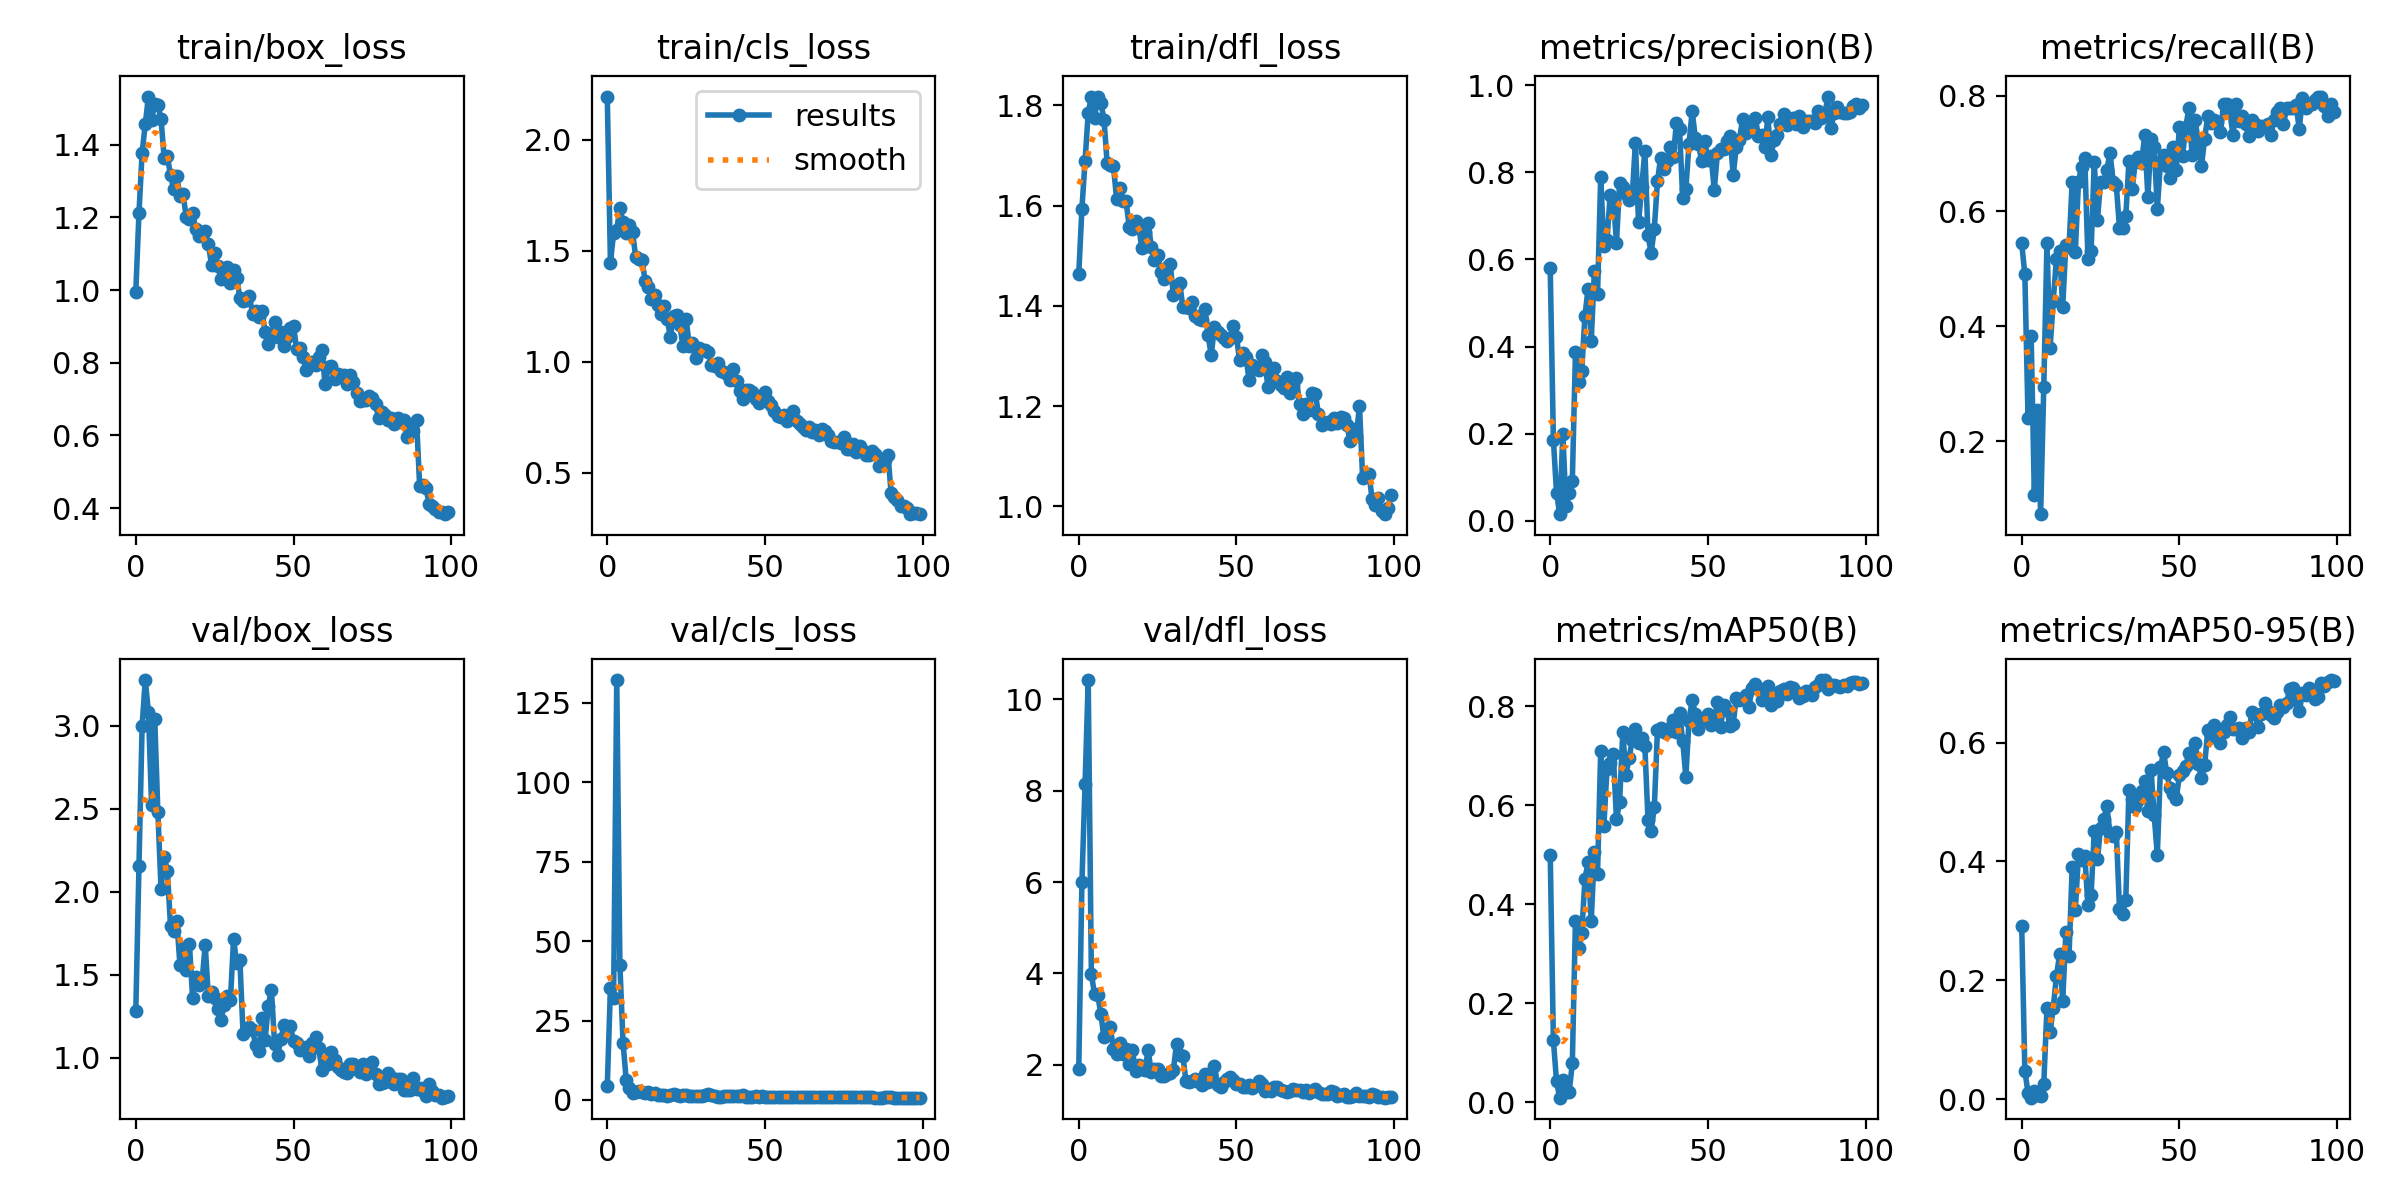

In [ ]:
from PIL import Image

%cd {HOME}

img = Image.open(f'{HOME}/runs/detect/train7/results.png')
img.show()

In [ ]:
# Validar o modelo
%cd {HOME}

!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train7/weights/best.pt \
data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/Fox-Detector-DataSet-2/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Fox-Detector-DataSet-2/valid/images/145de9b828a964f9_jpg.rf.2a49209f82af3b0eb14c44bfd5e80f02.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.43it/s]
                   all        117        149      0.946      0.785      0.845      0.706
Speed: 9.3ms preprocess, 12.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Testar o modelo em imagens salvas na pasta predict
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train7/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/58 /content/Fox-Detector-DataSet-2/test/images/06dcda7babea0933_jpg.rf.6a0e2e6df773e525e472f2933529b6a0.jpg: 640x640 1 Fox, 26.2ms
image 2/58 /content/Fox-Detector-DataSet-2/test/images/09ce2931e9b28e5a_jpg.rf.097327868e921361cc30796f74609ffb.jpg: 640x640 1 Fox, 22.3ms
image 3/58 /content/Fox-Detector-DataSet-2/test/images/0c0f86df062d0f8a_jpg.rf.2404ea8f631b23746b294905fcc7cf21.jpg: 640x640 1 Fox, 27.7ms
image 4/58 /content/Fox-Detector-DataSet-2/test/images/0dd854842c7772ff_jpg.rf.0b4b5b68dbddda24da8b514322fc6e98.jpg: 640x640 1 Fox, 16.3ms
image 5/58 /content/Fox-Detector-DataSet-2/test/images/0f85a83b7b3e9fc2_jpg.rf.adae7c46311970c2d45c7e6d0ca82d5b.jpg: 640x640 1 Fox, 16.3ms
image 6/58 /content/Fox-Detector-DataSet-2/test/images/1217b6d7a1486677_jpg.rf.a9c43482faf2f735456eb9f2b491830a.jpg: 640x640 1 Fox, 16.3ms
image 7/58

In [ ]:
# Verifica o modelo em um video
!yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train7/weights/best.pt \
conf=0.25 \
source=/content/Extra-Tests/TestVideo.mp4

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

video 1/1 (1/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 153.0ms
video 1/1 (2/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 13.3ms
video 1/1 (3/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (4/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.5ms
video 1/1 (5/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 19.7ms
video 1/1 (6/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (7/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (8/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (9/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (10/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 11.1ms
video 1/1 (11/2410) /content/Extra-Tests/TestVideo.mp4: 384x640 1 Fox, 1